# 서울시 구별 CCTV 현황 분석하기

### 1-1 엑셀파일 읽기 - CCTV 현황

In [58]:
import pandas as pd

In [59]:
# read_csv함수: csv파일 읽기(경로. 인코딩)
# head함수: 상위 5개만 출력하기

CCTV_Seoul = pd.read_csv('CCTV_in_Seoul.csv', encoding='utf-8')
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [60]:
# columns: 칼럼명 보기

CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [61]:
# colmns[0] : columns의 0번째 출력하기

CCTV_Seoul.columns[0]

'기관명'

In [62]:
# rename함수: 칼럼 이름 다시 바꾸기

CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


### 1-2 엑셀파일 읽기 - 서울시 인구현황

In [63]:
# read_excel(경로) : 엑셀파일 불러오기

pop_Seoul = pd.read_excel('population_in_Seoul.xls')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [64]:
# head = 2 :2번째부터(0부터 시작) 불러오기
# usecols : 엑셀파일의 B...열만 불러오기

pop_Seoul = pd.read_excel('population_in_Seoul.xls',
                         header = 2,
                         usecols = 'B, D, G, J, N')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [65]:
pop_Seoul.rename(columns={pop_Seoul.columns[0] : '구별',
                         pop_Seoul.columns[1] : '인구수', 
                          pop_Seoul.columns[2] : '한국인', 
                          pop_Seoul.columns[3] : '외국인', 
                          pop_Seoul.columns[4] : '고령자'}, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


### 1-3 Pandas 기초

In [66]:
# numpy : 수치계산을 위한 모듈 (복잡한 수)
import numpy as np

In [67]:
#Series : 파이썬 리스트 형태로 쓰는 것

s = pd.Series([1,2,3,np.nan,6,8])
print(s)

0    1.0
1    2.0
2    3.0
3    NaN
4    6.0
5    8.0
dtype: float64


In [68]:
# date_range : 날짜형 데이터. periods: 기간
# date_range(시작 날짜, periods=6)

dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [69]:
# dataframe : 표형태로 데이터생성
# np.random.randn : 넘파이의 랜덤함수를 정규분표기준으로 난수를 생성성
# randn(6,4) : 6X4 형태로 만든다는 뜻이다.
# index=dates : 인덱스를 위에 내가 만든 dates로 하겠다

df = pd.DataFrame(np.random.randn(6,4), index=dates,
                 columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
2013-01-01,2.040257,-0.802488,-2.285894,-3.487381
2013-01-02,0.785837,0.795965,0.627264,-0.275193
2013-01-03,0.176883,0.300731,-0.216815,0.180593
2013-01-04,0.592769,0.357712,1.443564,-0.499501
2013-01-05,-1.548495,-1.854516,-0.151378,0.941894
2013-01-06,-0.641938,0.442363,0.135952,0.415668


In [70]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [71]:
#Values : df안에 있는 값만 가져오겠당

df.values

array([[ 2.04025695, -0.80248832, -2.28589424, -3.4873809 ],
       [ 0.78583744,  0.79596516,  0.62726444, -0.27519342],
       [ 0.17688312,  0.30073146, -0.21681518,  0.18059304],
       [ 0.59276939,  0.35771227,  1.44356418, -0.49950131],
       [-1.54849491, -1.85451609, -0.15137836,  0.94189439],
       [-0.6419376 ,  0.44236343,  0.1359524 ,  0.41566805]])

In [72]:
# df의 정보를 보겠다

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [73]:
# 통계적 개요를 알 수 있다

df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.234219,-0.126705,-0.074551,-0.453987
std,1.236416,1.003448,1.245609,1.571178
min,-1.548495,-1.854516,-2.285894,-3.487381
25%,-0.437232,-0.526683,-0.200456,-0.443424
50%,0.384826,0.329222,-0.007713,-0.047300
75%,0.737570,0.421201,0.504436,0.356899
max,2.040257,0.795965,1.443564,0.941894


In [74]:
# by를 기준으로 df를 정렬하겠다. 
# ascending : 오름차순 (False는 내림차순)

df.sort_values(by='B', ascending=False)

,A,B,C,D
2013-01-02,0.785837,0.795965,0.627264,-0.275193
2013-01-06,-0.641938,0.442363,0.135952,0.415668
2013-01-04,0.592769,0.357712,1.443564,-0.499501
2013-01-03,0.176883,0.300731,-0.216815,0.180593
2013-01-01,2.040257,-0.802488,-2.285894,-3.487381
2013-01-05,-1.548495,-1.854516,-0.151378,0.941894


In [75]:
# df의 A열만 출력한다

df['A']

2013-01-01    2.040257
2013-01-02    0.785837
2013-01-03    0.176883
2013-01-04    0.592769
2013-01-05   -1.548495
2013-01-06   -0.641938
Freq: D, Name: A, dtype: float64

In [76]:
# df의 0~2까지의 행 값을 출력
# 행 기준이당

df[0:3]

,A,B,C,D
2013-01-01,2.040257,-0.802488,-2.285894,-3.487381
2013-01-02,0.785837,0.795965,0.627264,-0.275193
2013-01-03,0.176883,0.300731,-0.216815,0.180593


In [77]:
# df의 아래의 인덱스 명으로 슬라이싱 출력

df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.785837,0.795965,0.627264,-0.275193
2013-01-03,0.176883,0.300731,-0.216815,0.180593
2013-01-04,0.592769,0.357712,1.443564,-0.499501


In [78]:
# 행기준으로 출력하는데 0번째만 뽑는다(첫번째 줄)

df.loc[dates[0]]

A    2.040257
B   -0.802488
C   -2.285894
D   -3.487381
Name: 2013-01-01 00:00:00, dtype: float64

In [79]:
# : 처음부터 끝까지 뽑는데 A,B 컬럼만 뽑는다


df.loc[:,['A', 'B']]

,A,B
2013-01-01,2.040257,-0.802488
2013-01-02,0.785837,0.795965
2013-01-03,0.176883,0.300731
2013-01-04,0.592769,0.357712
2013-01-05,-1.548495,-1.854516
2013-01-06,-0.641938,0.442363


In [80]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.785837,0.795965
2013-01-03,0.176883,0.300731
2013-01-04,0.592769,0.357712


In [81]:
df.loc['20130102',['A','B']]

A    0.785837
B    0.795965
Name: 2013-01-02 00:00:00, dtype: float64

In [82]:
df.loc[dates[0],'A']

2.040256952394011

In [83]:
# iloc : 행, 열을 슷자(위치)로 접근하여 출력
# 3 = 3번 행을 의미

df.iloc[3]

A    0.592769
B    0.357712
C    1.443564
D   -0.499501
Name: 2013-01-04 00:00:00, dtype: float64

In [84]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.592769,0.357712
2013-01-05,-1.548495,-1.854516


In [85]:
# 1,2,4 행과 0,2 열을 본다
# iloc는 위치를 리스트로 지정해서 본다. loc는 X

df.iloc[[1,2,4], [0,2]]

,A,C
2013-01-02,0.785837,0.627264
2013-01-03,0.176883,-0.216815
2013-01-05,-1.548495,-0.151378


In [86]:
# 특정조건을 만족하는 값만 뽑는다
# A열에서 0보다 큰 값만 뽑는다.

df[df.A > 0]

,A,B,C,D
2013-01-01,2.040257,-0.802488,-2.285894,-3.487381
2013-01-02,0.785837,0.795965,0.627264,-0.275193
2013-01-03,0.176883,0.300731,-0.216815,0.180593
2013-01-04,0.592769,0.357712,1.443564,-0.499501


In [87]:
#만족하지 않는 값은 NaN으로 나온다.

df[df > 0]

,A,B,C,D
2013-01-01,2.040257,NaN,NaN,NaN
2013-01-02,0.785837,0.795965,0.627264,NaN
2013-01-03,0.176883,0.300731,NaN,0.180593
2013-01-04,0.592769,0.357712,1.443564,NaN
2013-01-05,NaN,NaN,NaN,0.941894
2013-01-06,NaN,0.442363,0.135952,0.415668


In [88]:
# df의 값만 복사한다.

df2 = df.copy()

In [89]:
# E열을 넣었다

df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,2.040257,-0.802488,-2.285894,-3.487381,one
2013-01-02,0.785837,0.795965,0.627264,-0.275193,one
2013-01-03,0.176883,0.300731,-0.216815,0.180593,two
2013-01-04,0.592769,0.357712,1.443564,-0.499501,three
2013-01-05,-1.548495,-1.854516,-0.151378,0.941894,four
2013-01-06,-0.641938,0.442363,0.135952,0.415668,three


In [90]:
# df의 E열에 저 값이 있나?

df2['E'].isin(['two', 'four'])

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool

In [91]:
# df2의 E열 two와 four만 나온다

df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,0.176883,0.300731,-0.216815,0.180593,two
2013-01-05,-1.548495,-1.854516,-0.151378,0.941894,four


In [92]:
# apply : 통계 느낌의 데이터를 본다
# cumsum : 누적합을 본다

df.apply(np.cumsum)

,A,B,C,D
2013-01-01,2.040257,-0.802488,-2.285894,-3.487381
2013-01-02,2.826094,-0.006523,-1.658630,-3.762574
2013-01-03,3.002978,0.294208,-1.875445,-3.581981
2013-01-04,3.595747,0.651921,-0.431881,-4.081483
2013-01-05,2.047252,-1.202596,-0.583259,-3.139588
2013-01-06,1.405314,-0.760232,-0.447307,-2.723920


### 1-4 CCTV 데이터 파악하기

In [93]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [94]:
CCTV_Seoul.sort_values(by='소계').head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [95]:
# 최근증가율은 만든다.

CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + \
                        CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전']  * 100
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


### 1-5 서울시 인구 데이터 파악하기

In [96]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [97]:
# drop : 지우는 함수
# 0번째 행 자체를 지운다

pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [98]:
# 중복값을 제거한..

pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [99]:
# 구별에서 null값인 것만 출력

pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [100]:
pop_Seoul.drop([26], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [101]:

pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [102]:
pop_Seoul.sort_values(by='인구수', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [103]:
pop_Seoul.sort_values(by='외국인', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [104]:
pop_Seoul.sort_values(by='고령자', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


### 1-6 Pandas 두 DataFrame 병합하기

In [105]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

In [106]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [107]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [108]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [109]:
# concat : 병합을 위한 함수

result = pd.concat([df1, df2, df3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [110]:
result = pd.concat([df1, df2, df3], keys=['x','y','z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [111]:
result.index

MultiIndex([('x',  0),
            ('x',  1),
            ('x',  2),
            ('x',  3),
            ('y',  4),
            ('y',  5),
            ('y',  6),
            ('y',  7),
            ('z',  8),
            ('z',  9),
            ('z', 10),
            ('z', 11)],
           )

In [112]:
#values의 레벨(위에서 key부분)만 보여준다.

result.index.get_level_values(0)

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'z', 'z', 'z', 'z'], dtype='object')

In [113]:
result.index.get_level_values(1)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [114]:
# axis : 0은 위아래로 합치기
         #1은 왼쪽오른쪽으로 합치기

df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'], 
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

result = pd.concat([df1, df4], axis=1)

In [115]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [116]:
result 

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [117]:
# 공통된 인덱스는 합치고 공통되지 않는 인덱스는 버린다
# concat은 행 인덱스 기준으로 합친다

result = pd.concat([df1, df4], axis=1, join='inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [118]:
# ignore : 인덱스를 무시
# 인덱스가 겹치는 것만 

result = pd.concat([df,df4], ignore_index=True)
result

,A,B,C,D,F
0,2.040257,-0.802488,-2.285894,-3.487381,NaN
1,0.785837,0.795965,0.627264,-0.275193,NaN
2,0.176883,0.300731,-0.216815,0.180593,NaN
3,0.592769,0.357712,1.443564,-0.499501,NaN
4,-1.548495,-1.854516,-0.151378,0.941894,NaN
5,-0.641938,0.442363,0.135952,0.415668,NaN
6,NaN,B2,NaN,D2,F2
7,NaN,B3,NaN,D3,F3
8,NaN,B6,NaN,D6,F6
9,NaN,B7,NaN,D7,F7


In [123]:
left = pd.DataFrame({'key': ['K0', 'K4', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [124]:
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [125]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [126]:
# 공통된 key값만 합친다
# merge : 합치는 함수
# on : = 어쩌구 기준으로 합친다

pd.merge(left, right, on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [128]:
# left의 기준 키로 합친다

pd.merge(left, right, how='left', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [130]:
# outer : 합집합 전체 다 합친다.

pd.merge(left, right, how='outer', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


In [131]:
#inner : 교집합

pd.merge(left, right, how='inner', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


### 1-7 CCTV 데이터와 인구 데이터 합치고 분석

In [133]:
# on : 뭘 기준으로 한다(구별이 공통적으로 있다)

data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [134]:
# del : 값만 삭제

del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [139]:
# 구별이라는 컬럼은 인덱스로 세팅함

data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

### 1-8 그래프 그리기 기초 - matplotlib

In [142]:
import matplotlib.pyplot as plt
%matplotlib inline

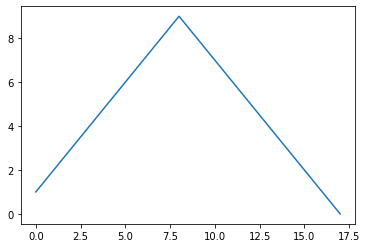

In [143]:
plt.figure()
plt.plot([1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0])
plt.show()

In [144]:
t = np.arange(0,12,0.01)

y = np.sin(t)

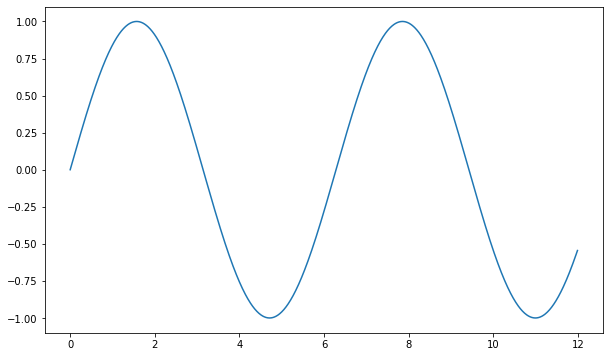

In [145]:
# figure : 그래프 틀
# plot : 값 넣기
# show : 그래프 보기

plt.figure(figsize=(10,6))
plt.plot(t,y)
plt.show()

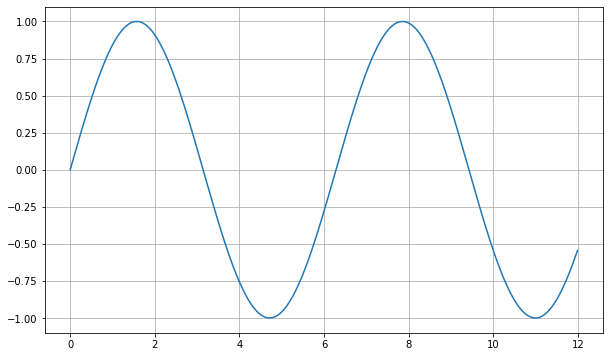

In [146]:
# grid : 뒤에 체크무늬 넣기

plt.figure(figsize=(10,6))
plt.plot(t,y)
plt.grid()
plt.show()

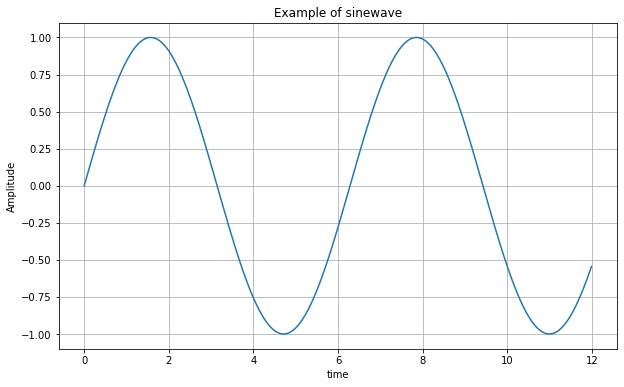

In [148]:
# xlabel : x축 이름
# ylabel : y축 이름

plt.figure(figsize=(10,6))
plt.plot(t, y)
plt.grid()
plt.xlabel('time')       # x축 라벨 적용하기
plt.ylabel('Amplitude')  # y축 라벨 적용하기
plt.title('Example of sinewave') #타이틀 이름
plt.show()

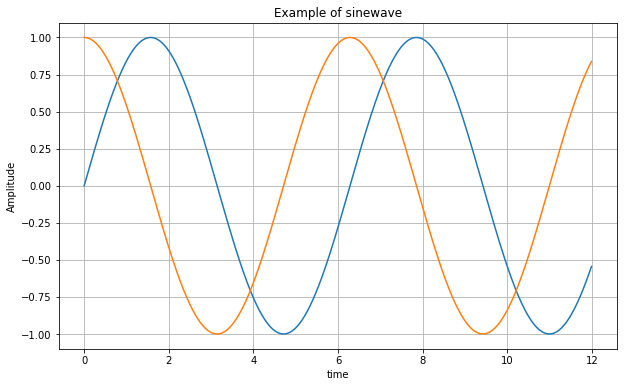

In [149]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t))
plt.plot(t, np.cos(t))
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

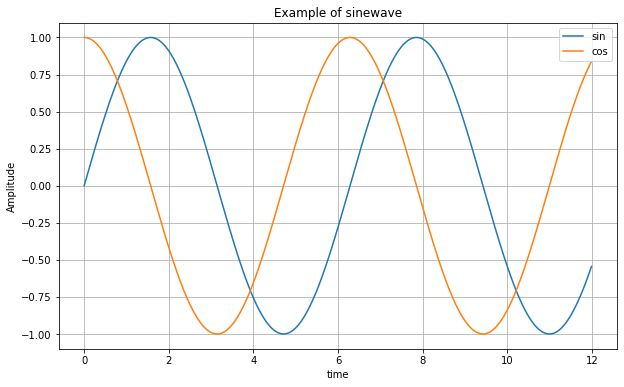

In [151]:
# legend : 범례

plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), label='sin')
plt.plot(t, np.cos(t), label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

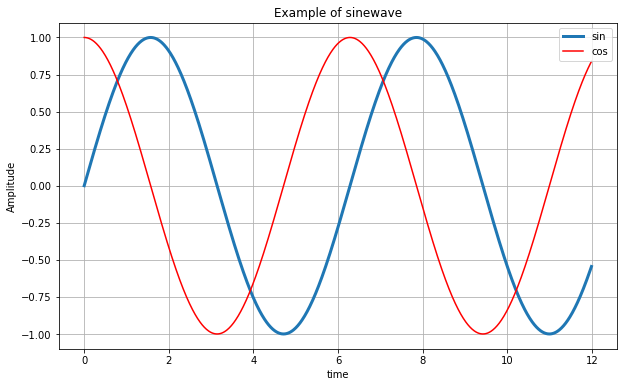

In [152]:
# lw : 선의 굵기
# 'r' : 색깔 레드

plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), lw=3, label='sin')
plt.plot(t, np.cos(t), 'r', label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

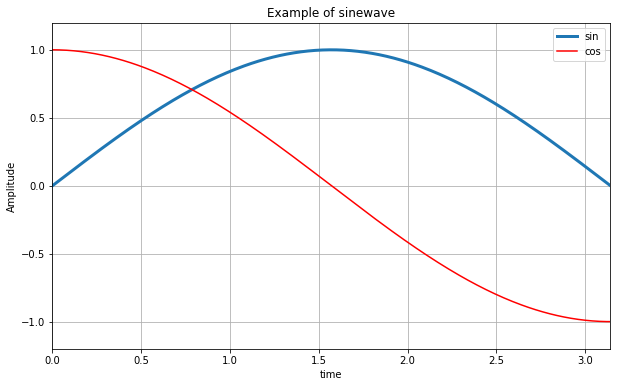

In [153]:
# ylim : 이만큼만 보여준다
# xlim : 위랑 같음

plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), lw=3, label='sin')
plt.plot(t, np.cos(t), 'r', label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.ylim(-1.2, 1.2)
plt.xlim(0, np.pi)
plt.show()

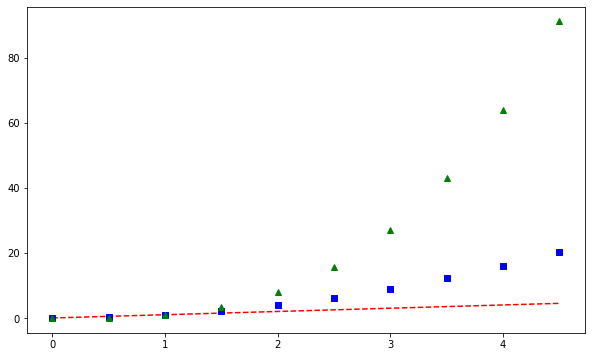

In [154]:
# 'r--' : 빨간색으로 그래프 선이 찍찍이
# 'bs' : 그래프 선을 파란네모로
# g^ : 그래프 선을 초록색 세모

t = np.arange(0, 5, 0.5)

plt.figure(figsize=(10,6))
plt.plot(t, t, 'r--')
plt.plot(t, t**2, 'bs')
plt.plot(t, t**3, 'g^')
plt.show()

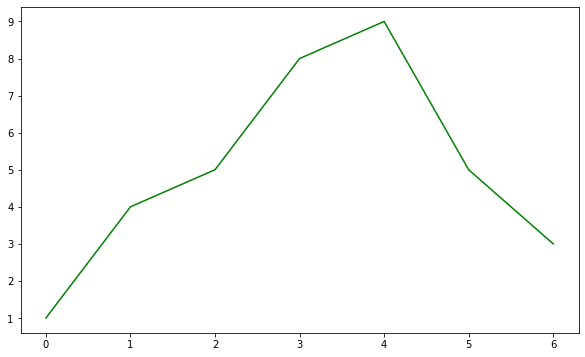

In [155]:
t = [0, 1, 2, 3, 4, 5, 6] 
y = [1, 4, 5, 8, 9, 5, 3]

plt.figure(figsize=(10,6))
plt.plot(t, y, color='green')
plt.show()

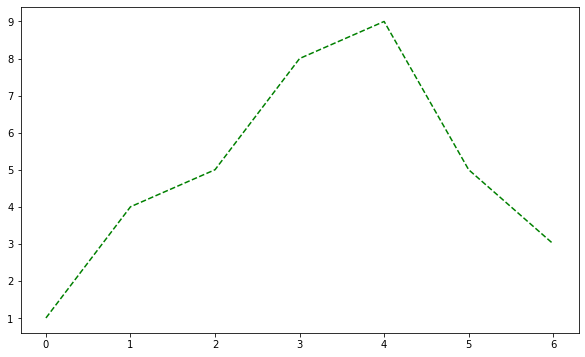

In [156]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed')
plt.show()

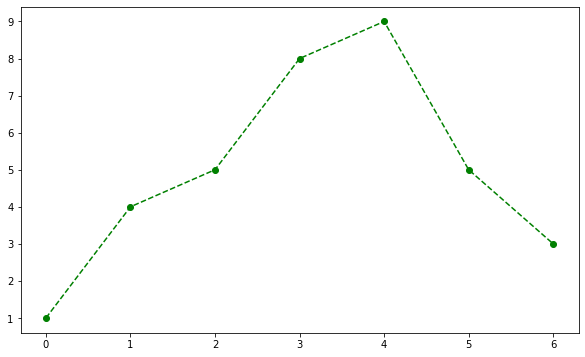

In [157]:
# marker = 'o' : 값을 동그라미로

plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o')
plt.show()

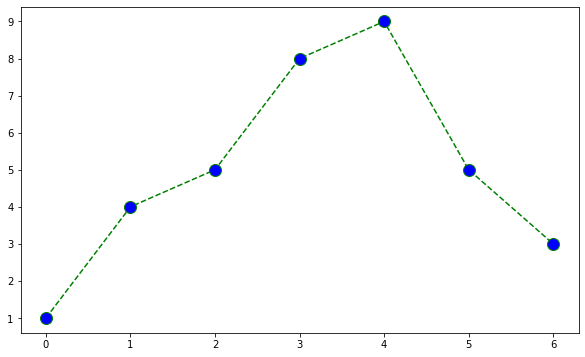

In [160]:
# markerfacecolor = 'blue' : 마커 색깔 블루
# markersize : 마커 크기 지정

plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o',
        markerfacecolor = 'blue', markersize=12)
plt.show()

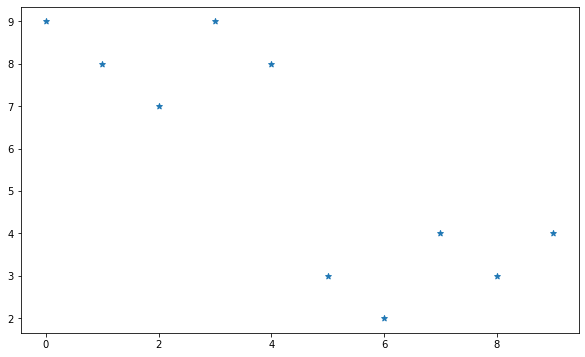

In [167]:
# scatter : 점 그래프
# plot : 선 그래프

t = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,9,8,3,2,4,3,4])
plt.figure(figsize=(10,6))
plt.scatter(t,y, marker = '*')
plt.show()

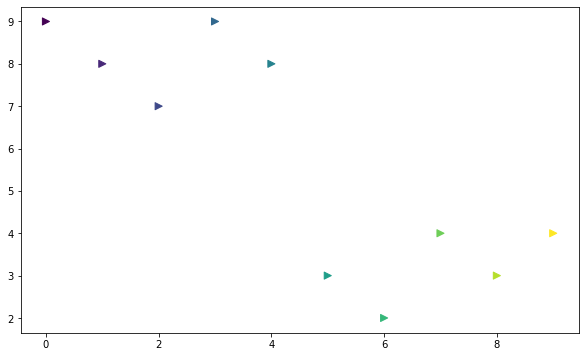

In [168]:
#colormap : t에 따라 색깔 변경

colormap = t

plt.figure(figsize=(10,6))
plt.scatter(t,y, s = 50, c = colormap, marker='>')
plt.show()

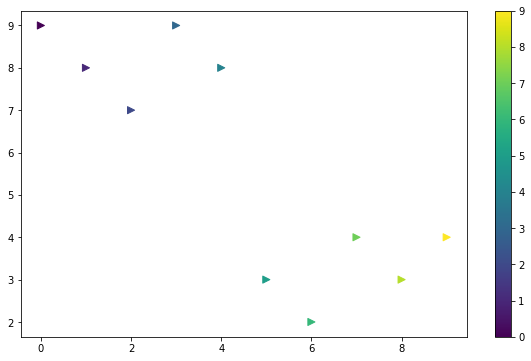

In [169]:
# colorbar : 컬러 그래프.....

colormap = t

plt.figure(figsize=(10,6))
plt.scatter(t,y, s = 50, c = colormap, marker='>')
plt.colorbar()
plt.show()

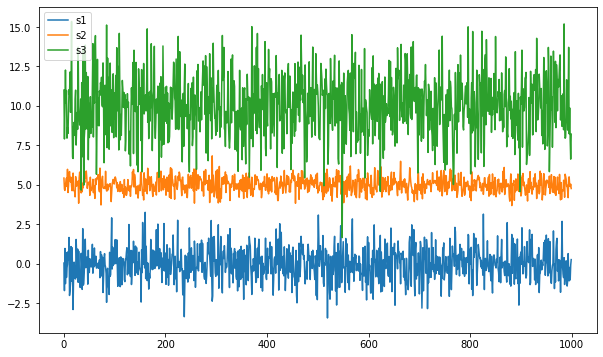

In [170]:
# loc : 평균값
# scale : 표준편차

s1 = np.random.normal(loc=0, scale=1, size=1000)
s2 = np.random.normal(loc=5, scale=0.5, size=1000)
s3 = np.random.normal(loc=10, scale=2, size=1000)
plt.figure(figsize=(10,6))
plt.plot(s1, label='s1')
plt.plot(s2, label='s2')
plt.plot(s3, label='s3')
plt.legend()
plt.show()

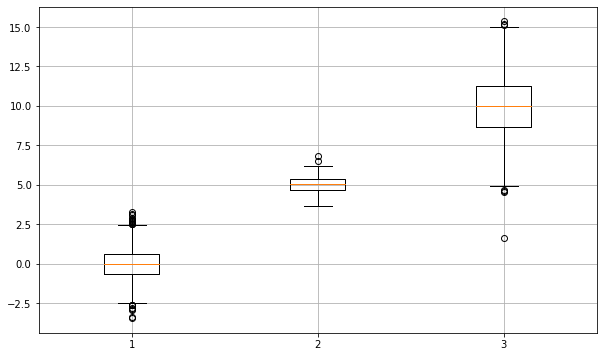

In [171]:
# boxplot : 박스형 그래프

plt.figure(figsize=(10,6))
plt.boxplot((s1, s2, s3))
plt.grid()
plt.show()

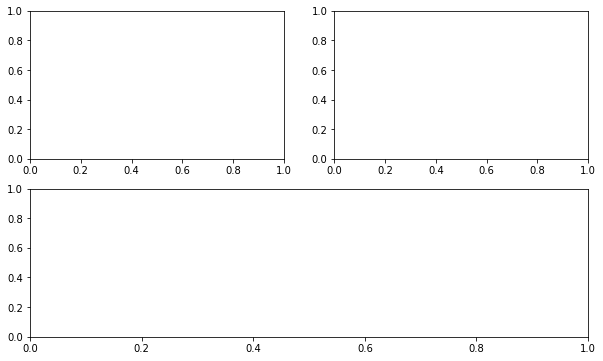

In [172]:
# subplot(웅앵웅) : 서브 그래프 생성 (위치 지정)

plt.figure(figsize=(10,6))

plt.subplot(221)
plt.subplot(222)
plt.subplot(212)

plt.show()

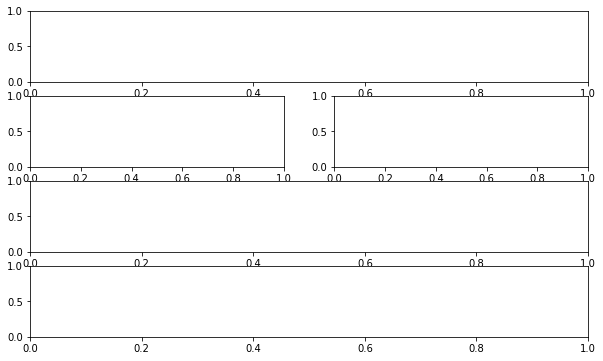

In [173]:
plt.figure(figsize=(10,6))

plt.subplot(411)
plt.subplot(423)
plt.subplot(424)
plt.subplot(413)
plt.subplot(414)

plt.show()

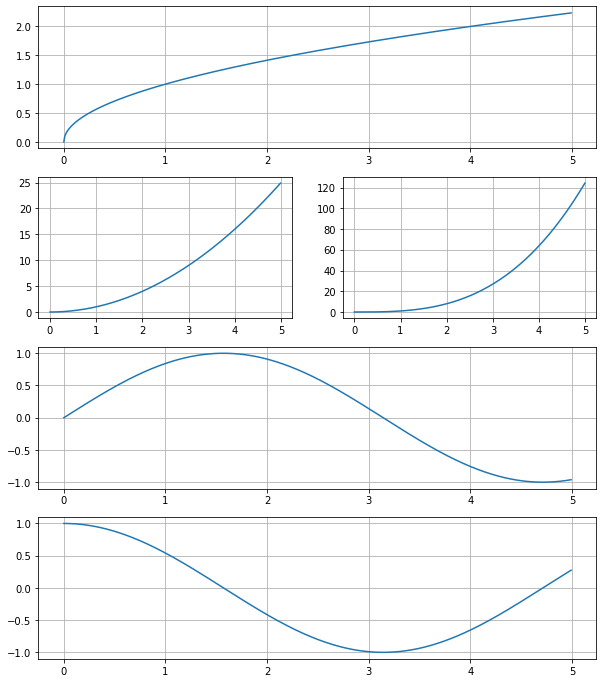

In [174]:
t = np.arange(0,5,0.01)

plt.figure(figsize=(10,12))

plt.subplot(411)
plt.plot(t,np.sqrt(t))
plt.grid()

plt.subplot(423)
plt.plot(t,t**2)
plt.grid()

plt.subplot(424)
plt.plot(t,t**3)
plt.grid()

plt.subplot(413)
plt.plot(t,np.sin(t))
plt.grid()

plt.subplot(414)
plt.plot(t,np.cos(t))
plt.grid()

plt.show()

### 1-9 CCTV와 인구현황 그래프로 분석

In [177]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


In [178]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


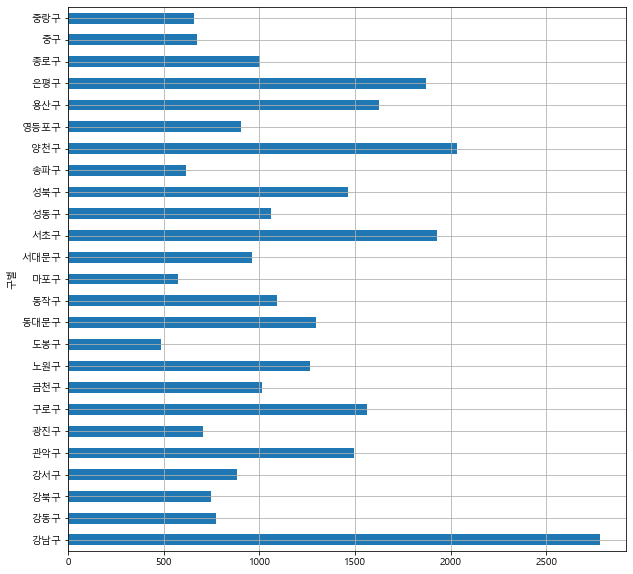

In [179]:
# kind : 종류
# bar : 수평바

plt.figure()
data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

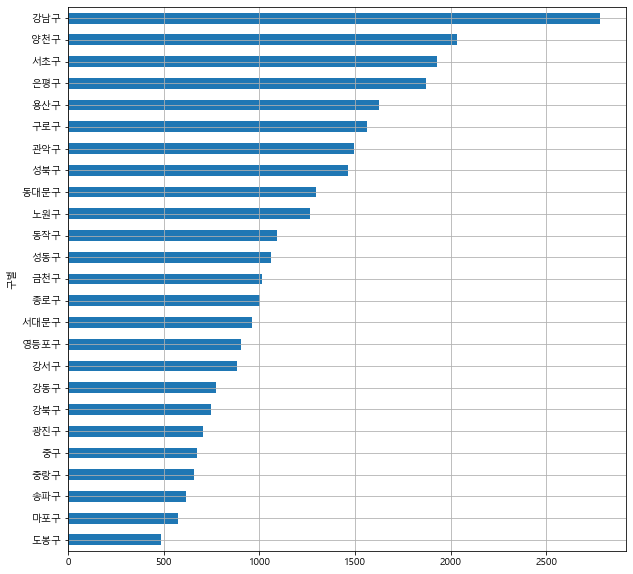

In [180]:
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

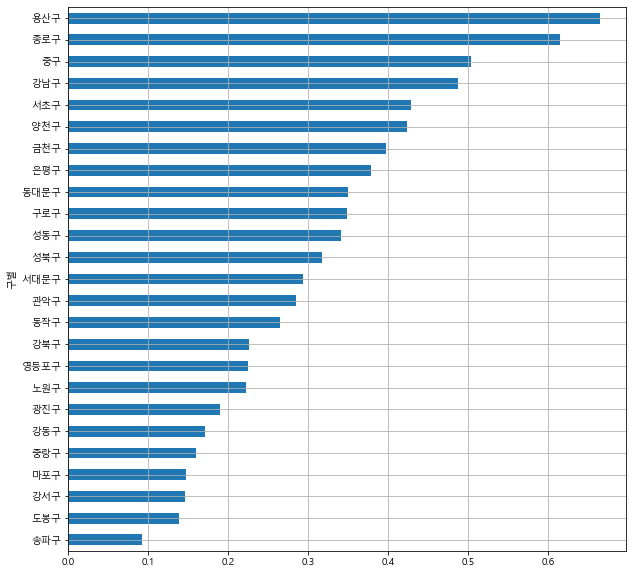

In [181]:
# CCTV비율을 넣어서 

data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100

data_result['CCTV비율'].sort_values().plot(kind='barh', 
                                         grid=True, figsize=(10,10))
plt.show()

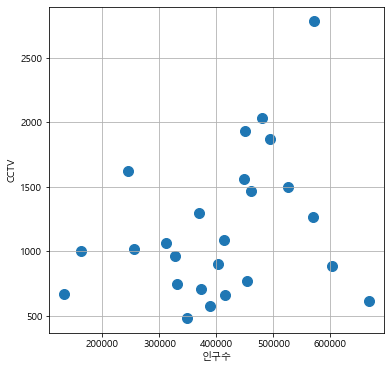

In [183]:
# s = : 마크 사이즈

plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=100)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [184]:
# polyfit : 직선을 그리는 것

fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([1.30916415e-03, 6.45066497e+02])

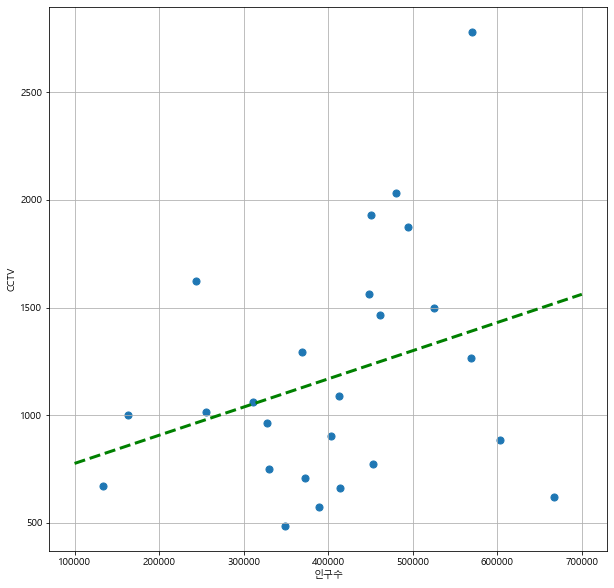

In [185]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

### 1-10 더 설득력 있는 자료 만들기

In [186]:
# 컬럼 오차를 만든다
# abs : 절대값

fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


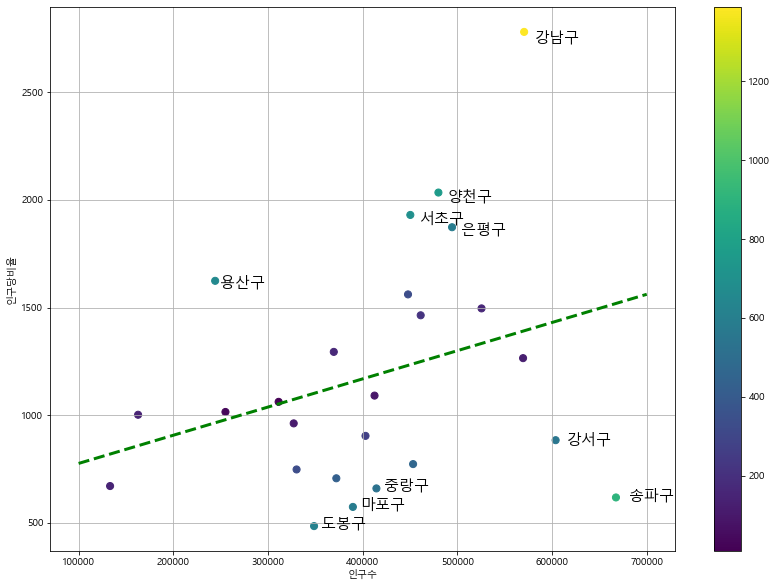

In [187]:
# scatter : 점 그래프
# c=data_result['오차'] : 컬러 기준을 오차로 하겠다
# 

plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'], 
            c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, 
             df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()